<a href="https://colab.research.google.com/github/Pavan0704/Diabetes-prediction-using-KNN/blob/main/Diabetes_Prediction_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

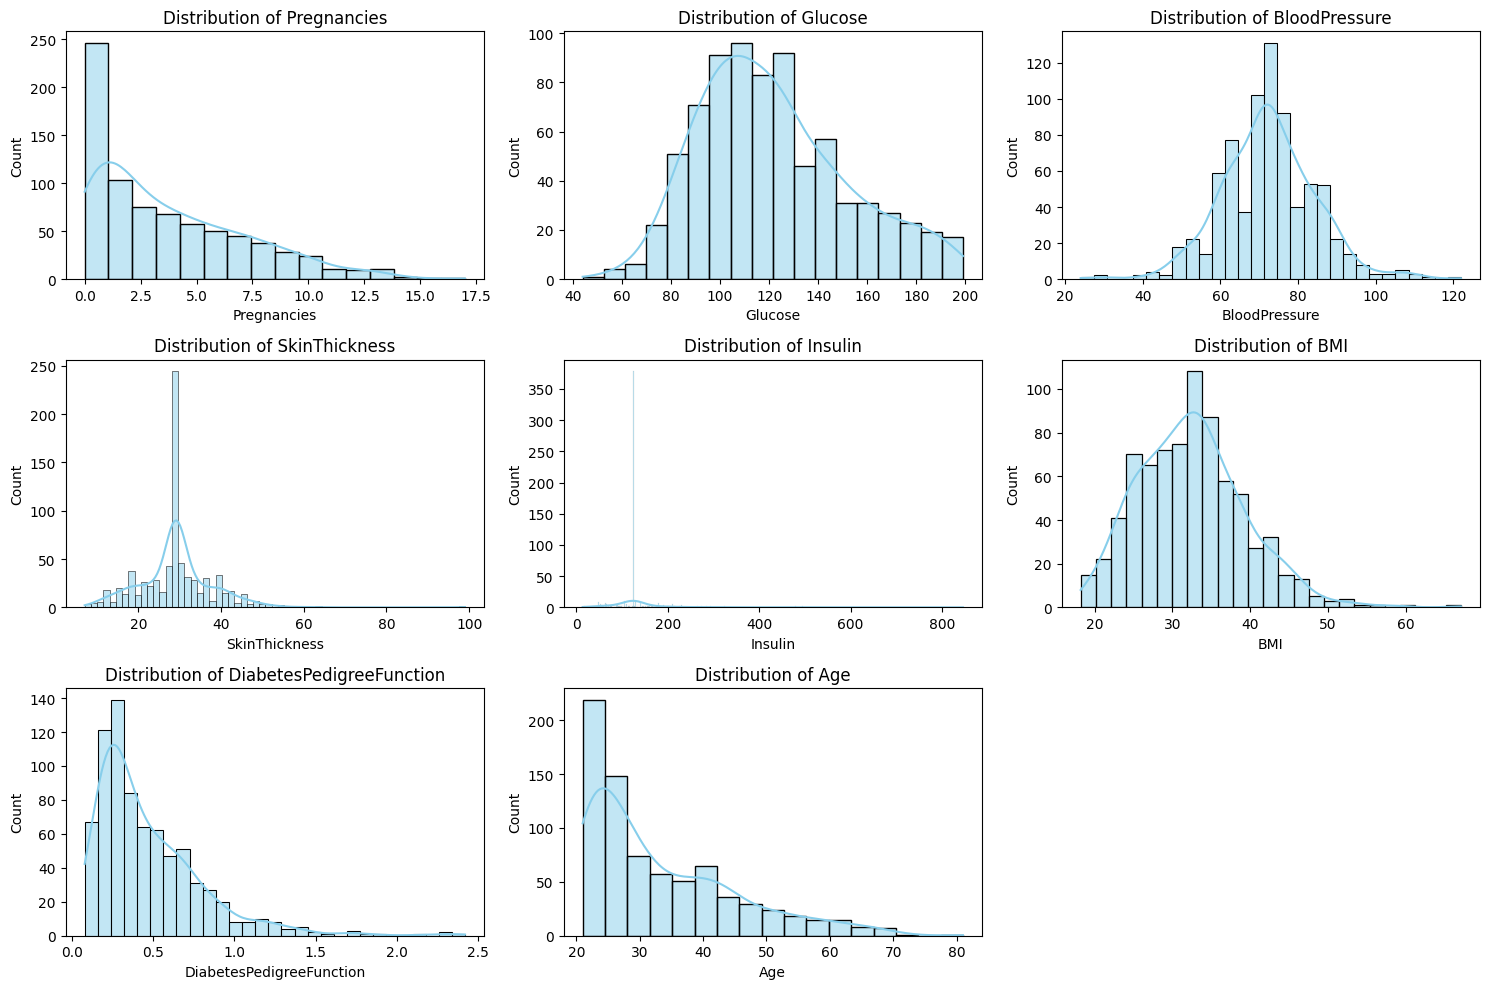

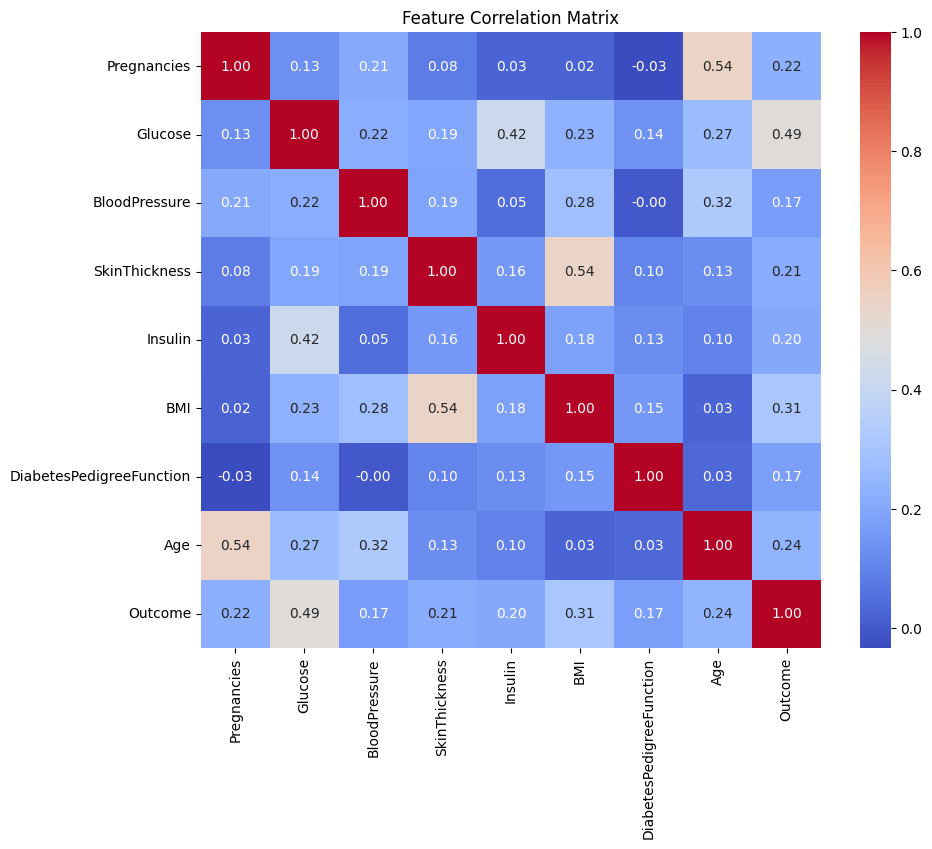

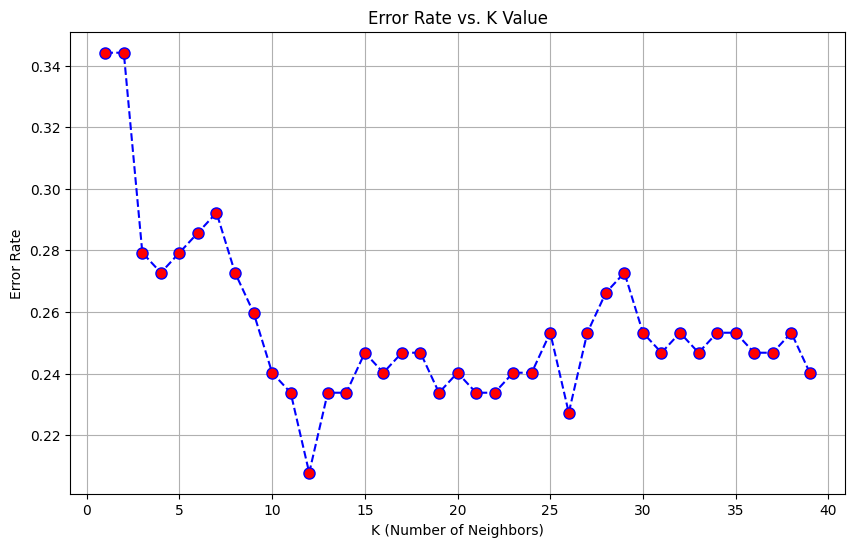

--- KNN Model Performance (K=12) ---

Confusion Matrix:
[[87 12]
 [20 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Accuracy Score: 79.22%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load the dataset
# Ensure the 'diabetes.csv' file is in your working directory
df = pd.read_csv('diabetes.csv')

# 2. Data Cleaning
# Replace 0 with NaN in columns where 0 is biologically impossible
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

# Impute missing values with the median of each column
df.fillna(df.median(), inplace=True)

# 3. Exploratory Data Analysis (Visualizations)

# Visualization 1: Distribution of Feature Columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualization 2: Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# 4. Data Preparation
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into Training and Testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Crucial for KNN as it uses distance-based metrics)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Analyzing Error Rate vs. K Value
error_rate = []

# Testing K values from 1 to 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

# Visualization 3: Plotting Error Rate vs. K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# 6. Training the Final Model
# K=12 was found to be the optimal choice to balance bias and variance
best_k = 12
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)

# 7. Model Evaluation
print(f"--- KNN Model Performance (K={best_k}) ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2%}")